In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

music_data = pd.read_csv("Resources/top10s.csv", encoding = "ISO-8859-1")

In [37]:
music_df = pd.DataFrame(music_data)
music_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [38]:
columns = {"title": "Title", "artist": "Artist", "top genre": "Top Genre", "year": "Year", "bpm": "Beats per Minute (BPM)", 
           "nrgy": "Energy", "dnce": "Danceability", "dB": "Loudness (dB)", "live": "Liveness", "val": "Valence", 
           "dur": "Duration (sec)", "acous": "Acousticness", "spch": "Speechiness", "pop": "Popularity"}

clean_music_df = music_df.rename(columns = columns)
clean_music_df.head()

,Unnamed: 0,Title,Artist,Top Genre,Year,Beats per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [39]:
music_subset_data_df=pd.DataFrame(clean_music_df,columns=['Title','Artist','Year','Energy',
                                                          'Danceability','Valence','Popularity'])
music_subset_data_df.head()

,Title,Artist,Year,Energy,Danceability,Valence,Popularity
0,"Hey, Soul Sister",Train,2010,89,67,80,83
1,Love The Way You Lie,Eminem,2010,93,75,64,82
2,TiK ToK,Kesha,2010,84,76,71,80
3,Bad Romance,Lady Gaga,2010,92,70,71,79
4,Just the Way You Are,Bruno Mars,2010,84,64,43,78


In [40]:
avg_music_data_by_year_df=music_subset_data_df.groupby('Year').mean()
avg_music_data_by_year_df

,Energy,Danceability,Valence,Popularity
Year,,,,
2010,77.901961,64.529412,57.000000,64.254902
2011,74.886792,63.641509,53.698113,61.867925
2012,75.485714,65.714286,64.171429,67.771429
2013,73.873239,62.042254,53.183099,63.985915
2014,67.775862,62.534483,52.086207,62.706897
2015,70.336842,63.663158,52.526316,64.568421
2016,67.237500,63.325000,45.150000,64.162500
2017,69.169231,65.369231,52.276923,69.015385
2018,65.468750,67.203125,48.765625,72.437500


In [41]:
clean_music_df['Top Genre'] = clean_music_df['Top Genre'].replace(
    {"acoustic pop":"pop",
"art pop":"pop",
"australian pop":"pop","barbadian pop":"pop","baroque pop":"pop",
     "canadian pop":"pop","candy pop":"pop","colombian pop":"pop",
     "dance pop":"pop","danish pop":"pop","electropop":"pop",
     "folk-pop":"pop","french indie pop":"pop","hip pop":"pop",
     "indie pop":"pop","moroccan pop":"pop"})



In [65]:
genre_indexed = clean_music_df.set_index("Top Genre")
#music_genre_group = clean_music_df.groupby('Top Genre')

pop_valence = genre_indexed.loc["pop", "Valence"]

pop_energy = genre_indexed.loc["pop", "Energy"]

pop_danceability = genre_indexed.loc["pop", "Danceability"]

pop_popularity = genre_indexed.loc["pop", "Popularity"]



In [68]:
#Variables: 
pval_mean = pop_valence.mean()
pnrg_mean = pop_energy.mean()
pdance_mean = pop_danceability.mean()


all_valence = avg_music_data_by_year_df["Valence"]
all_nrg = avg_music_data_by_year_df["Energy"]
all_dance = avg_music_data_by_year_df["Danceability"]


genres = music_genre_group["Top Genre"].unique()




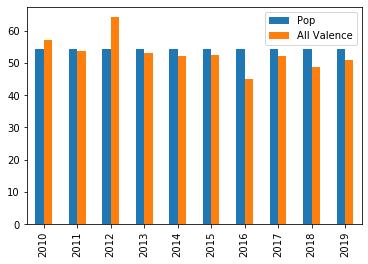

In [60]:
avg_valence_df = pd.DataFrame({"Pop": pval_mean, "All Valence":all_valence}, index=years)
avg_valence_df.plot.bar()

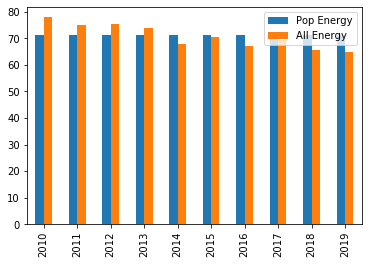

In [61]:
avg_energy_df = pd.DataFrame({"Pop Energy": pnrg_mean, "All Energy":all_nrg}, index=years)
avg_energy_df.plot.bar()

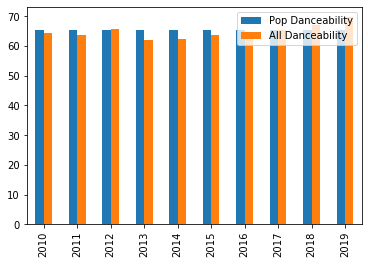

In [69]:
avg_dance_df = pd.DataFrame({"Pop Danceability": pdance_mean, "All Danceability":all_dance}, index=years)
avg_dance_df.plot.bar()